In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import StrMethodFormatter

import warnings
warnings.filterwarnings("ignore")

In [20]:
dataset = pd.read_csv("../data/historical_btc_sentiment.csv")

print(dataset.head(5))

         Date  Negative  Neutral  Positive          Open        Volume
0  2021-06-18       NaN      NaN       NaN  38099.476563  3.620089e+10
1  2021-06-19       NaN      NaN       NaN  35854.527344  3.120728e+10
2  2021-06-20       NaN      NaN       NaN  35563.140625  3.666403e+10
3  2021-06-21       NaN      NaN       NaN  35641.144531  5.280904e+10
4  2021-06-22       NaN      NaN       NaN  31622.376953  5.896435e+10


array([[<AxesSubplot:title={'center':'Negative'}>,
        <AxesSubplot:title={'center':'Neutral'}>],
       [<AxesSubplot:title={'center':'Positive'}>,
        <AxesSubplot:title={'center':'Open'}>],
       [<AxesSubplot:title={'center':'Volume'}>, <AxesSubplot:>]],
      dtype=object)

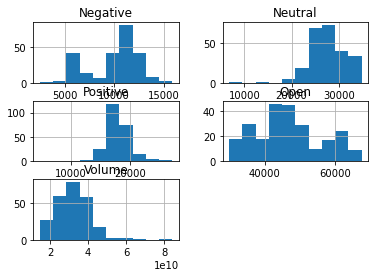

In [21]:
dataset.hist()

array([[<AxesSubplot:xlabel='Negative', ylabel='Negative'>,
        <AxesSubplot:xlabel='Neutral', ylabel='Negative'>,
        <AxesSubplot:xlabel='Positive', ylabel='Negative'>,
        <AxesSubplot:xlabel='Open', ylabel='Negative'>,
        <AxesSubplot:xlabel='Volume', ylabel='Negative'>],
       [<AxesSubplot:xlabel='Negative', ylabel='Neutral'>,
        <AxesSubplot:xlabel='Neutral', ylabel='Neutral'>,
        <AxesSubplot:xlabel='Positive', ylabel='Neutral'>,
        <AxesSubplot:xlabel='Open', ylabel='Neutral'>,
        <AxesSubplot:xlabel='Volume', ylabel='Neutral'>],
       [<AxesSubplot:xlabel='Negative', ylabel='Positive'>,
        <AxesSubplot:xlabel='Neutral', ylabel='Positive'>,
        <AxesSubplot:xlabel='Positive', ylabel='Positive'>,
        <AxesSubplot:xlabel='Open', ylabel='Positive'>,
        <AxesSubplot:xlabel='Volume', ylabel='Positive'>],
       [<AxesSubplot:xlabel='Negative', ylabel='Open'>,
        <AxesSubplot:xlabel='Neutral', ylabel='Open'>,
        <Axe

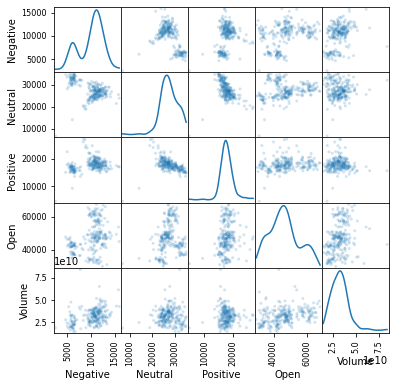

In [22]:
from pandas.plotting import scatter_matrix

scatter_matrix(dataset, alpha=0.2, figsize=(6, 6), diagonal='kde')

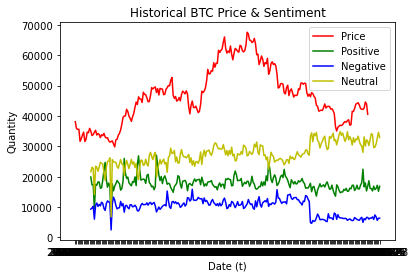

In [23]:
# Using Numpy to create an array X
X = dataset.Date
  
# Assign variables to the y axis part of the curve
y = dataset.Open
p = dataset.Positive
neg = dataset.Negative
neu = dataset.Neutral
  
# Plotting both the curves simultaneously
plt.plot(X, y, color='r', label='Price')
plt.plot(X, p, color='g', label='Positive')
plt.plot(X, neg, color='b', label='Negative')
plt.plot(X, neu, color='y', label='Neutral')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Date (t)")
plt.ylabel("Quantity")
plt.title("Historical BTC Price & Sentiment")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

plt.savefig("./images/sentiment_price_comparison.png")
# To load the display window
plt.show()

In [24]:
dataset["open_diff"] = dataset["Open"].diff()

In [25]:
dataset.head()

,Date,Negative,Neutral,Positive,Open,Volume,open_diff
0,2021-06-18,NaN,NaN,NaN,38099.476563,3.620089e+10,NaN
1,2021-06-19,NaN,NaN,NaN,35854.527344,3.120728e+10,-2244.949219
2,2021-06-20,NaN,NaN,NaN,35563.140625,3.666403e+10,-291.386719
3,2021-06-21,NaN,NaN,NaN,35641.144531,5.280904e+10,78.003906
4,2021-06-22,NaN,NaN,NaN,31622.376953,5.896435e+10,-4018.767578


array([[<AxesSubplot:title={'center':'Negative'}>,
        <AxesSubplot:title={'center':'Neutral'}>],
       [<AxesSubplot:title={'center':'Positive'}>,
        <AxesSubplot:title={'center':'Open'}>],
       [<AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'open_diff'}>]], dtype=object)

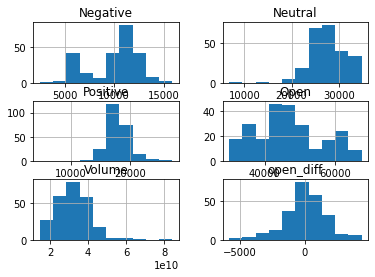

In [26]:
dataset.hist()

array([[<AxesSubplot:title={'center':'open_diff'}>]], dtype=object)

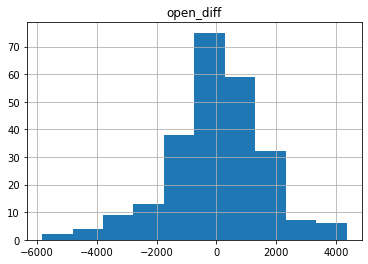

In [27]:
dataset.hist(column='open_diff')

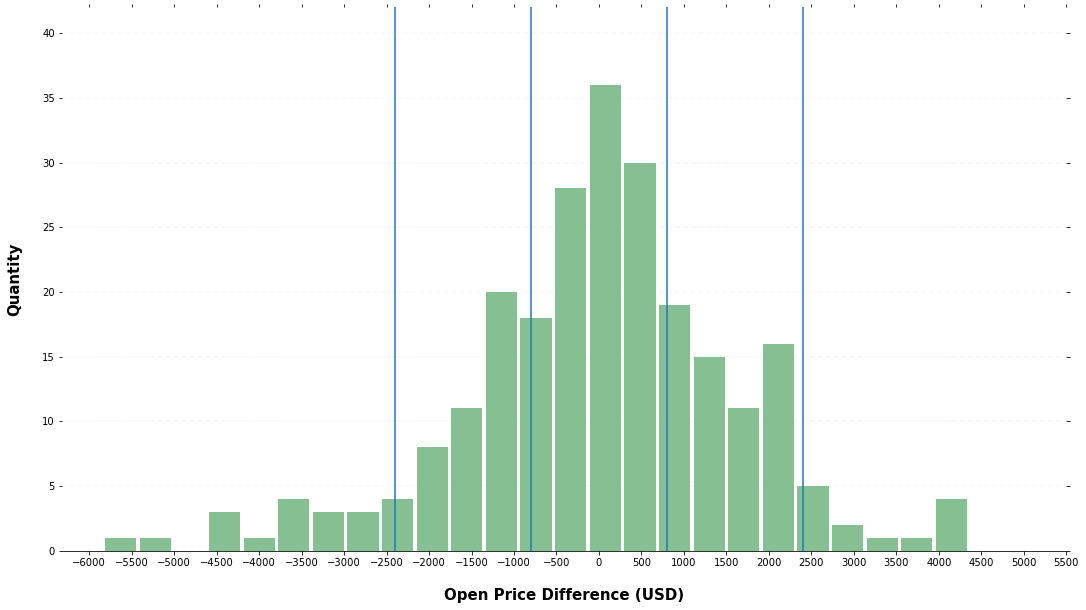

In [28]:
ax = dataset.hist(column='open_diff', bins=25, grid=False, figsize=(18,10), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Open Price Difference (USD)", labelpad=20, weight='bold', size=15)

    # Set y-axis label
    x.set_ylabel("Quantity", labelpad=20, weight='bold', size=15)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.set_xticks(np.arange(-6000, 6000, 500))

    value_range = [800, 2400]

    for value in value_range:
        x.axvline(x=value)
        x.axvline(x=-value)

In [31]:
dataset = dataset.dropna()

In [37]:
# 2 Strong Uptrend
# 1 Uptrend
# 0 No trend
# -1 Downtrend
# -2 Strong Downtrend
def categorize_trend(open_diff):
    if open_diff < 800 and open_diff > -800:
        return 0
    if open_diff > 800 and open_diff < 2400:
        return 1
    if open_diff > 2400:
        return 2
    if open_diff < -2400:
        return -2
    if open_diff > -2400 and open_diff < -800:
        return -1

dataset['trend'] = dataset.apply(lambda row: categorize_trend(row.open_diff), axis = 1)

In [38]:
dataset

,Date,Negative,Neutral,Positive,Open,Volume,open_diff,trend
13,2021-07-01,9336.0,21644.0,19892.0,35035.984375,3.783896e+10,-872.402344,-1
14,2021-07-02,9682.0,23126.0,17333.0,33549.601563,3.872897e+10,-1486.382812,-1
15,2021-07-03,10251.0,22728.0,17377.0,33854.421875,2.438396e+10,304.820312,0
16,2021-07-04,6030.0,14091.0,9365.0,34665.566406,2.492431e+10,811.144531,1
17,2021-07-05,10562.0,23450.0,17474.0,35284.343750,2.672155e+10,618.777344,0
...,...,...,...,...,...,...,...,...
241,2022-02-14,4973.0,28007.0,22475.0,42157.398438,2.082778e+10,-79.167968,0
242,2022-02-15,6206.0,33132.0,16671.0,42586.464844,2.272166e+10,429.066406,0
243,2022-02-16,5826.0,30080.0,17950.0,44578.277344,1.979255e+10,1991.812500,1
244,2022-02-17,6592.0,32143.0,15317.0,43937.070313,2.624666e+10,-641.207031,0


In [41]:
dataset = dataset.drop(columns=["open_diff"], axis=1)

In [42]:
dataset

,Date,Negative,Neutral,Positive,Open,Volume,trend
13,2021-07-01,9336.0,21644.0,19892.0,35035.984375,3.783896e+10,-1
14,2021-07-02,9682.0,23126.0,17333.0,33549.601563,3.872897e+10,-1
15,2021-07-03,10251.0,22728.0,17377.0,33854.421875,2.438396e+10,0
16,2021-07-04,6030.0,14091.0,9365.0,34665.566406,2.492431e+10,1
17,2021-07-05,10562.0,23450.0,17474.0,35284.343750,2.672155e+10,0
...,...,...,...,...,...,...,...
241,2022-02-14,4973.0,28007.0,22475.0,42157.398438,2.082778e+10,0
242,2022-02-15,6206.0,33132.0,16671.0,42586.464844,2.272166e+10,0
243,2022-02-16,5826.0,30080.0,17950.0,44578.277344,1.979255e+10,1
244,2022-02-17,6592.0,32143.0,15317.0,43937.070313,2.624666e+10,0


In [43]:
dataset.to_csv('../../bitcoin_prediction/data/historica_btc_trend_dataset.csv', index=False)